In [1]:
import tensorflow.compat.v1 as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras import utils
tf.disable_v2_behavior()

default_graph = tf.compat.v1.get_default_graph()

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
a = tf.constant(1.0)
b = tf.constant(2.0)

y = tf.add(a, b)

with tf.Session() as session:
    print(y.eval())

3.0


In [3]:
second_graph = tf.Graph()

In [4]:
with second_graph.as_default():
    a2 = tf.constant(2)
    b2 = tf.constant(3)
    c2 = tf.multiply(a2,b2)
    y2 = tf.pow(c2, 2)

In [5]:
with tf.Session(graph=second_graph) as session:
    print(y2.eval())

36


In [6]:
import tensorflow.keras.datasets.mnist as tfds

(train_images, train_data), (test_images, test_data) = tfds.load_data()
train_images = train_images / 255

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(200,input_dim=784, activation='relu'),
  tf.keras.layers.Dense(10, activation="softmax"),
])
model.compile(
   loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(0.2),
    metrics=['accuracy'],
)
model.fit(
    train_images,
    train_data,
    batch_size=200,
    epochs=10,
    validation_split=0.2,
    verbose=1,
)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - ETA: 0s - loss: 0.4635 - acc: 0.8710WARNING:tensorflow:From /usr/local/lib/python3.8/dist-packages/tensorflow/python/keras/engine/training_v1.py:2048: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
48000/48000 [==============================] - 3s 63us/sample - loss: 0.4635 - acc: 0.8710 - val_loss: 0.2755 - val_acc: 0.9198
Epoch 2/10
48000/48000 [==============================] - 4s 74us/sample - loss: 0.2530 - acc: 0.9279 - val_loss: 0.2183 - val_acc: 0.9381
Epoch 3/10
48000/48000 [==============================] - 3s 68us/sample - loss: 0.2017 - acc: 0.9420 - val_loss: 0.1876 - val_acc: 0.9482
Epoch 4/10
48000/48000 [==============================] - 3s 63us/sample - loss: 0.1691 - acc: 0

In [8]:
test_loss, test_acc = model.evaluate(test_images,  test_data, verbose=2)

print('\nTest accuracy:', test_acc)


Test accuracy: 0.969


In [9]:
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

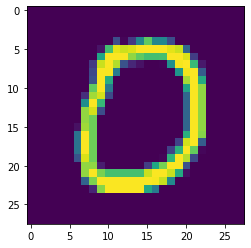

0 0


In [11]:
img_path = 'test_img/4_1.jpg'

#img = image.load_img(img_path, target_size=(28,28), color_mode="grayscale")
j = 10
img = test_images[j]
img = (np.expand_dims(img,0))
# img_arr = image.img_to_array(test_images[0])
# img_arr = 255 - img_arr
# img_arr = img_arr / 255
# img = image.array_to_img(img_arr)
plt.imshow(test_images[j])
plt.show()

probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(img)
pred = np.argmax(predictions[0])
print(pred, test_data[j])
class_names = ['0','1','2','3','4','5','6','7','8','9']

In [20]:
def plot_image(k, predictions_array, true_label, imag):
  true_label, imag = true_label[k], imag[k]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

IndexError: index 1 is out of bounds for axis 0 with size 1

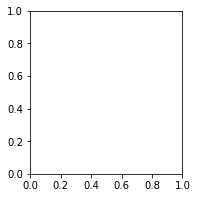

In [21]:
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_data, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_data)
plt.show()